In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Importing our data
data = pd.read_excel('table_8_offenses_known_to_law_enforcement_washington_by_city_2013.xls', 
                     encoding='latin1', skiprows=list(range(4)))
# Condense and clean our dataset
data = data.rename(index = str, columns={'Murder and\nnonnegligent\nmanslaughter': 'Murder', 'Property\ncrime': "Property_crime"})
data = data[['Population', 'Murder', 'Robbery', 'Property_crime']]
data = data[data.Population < 250000]
data = data.dropna()

# Create the new rows for our regression model
data['Pop_squared'] = data['Population']**2

# Preview the data
data.head()

,Population,Murder,Robbery,Property_crime,Pop_squared
0,16408.000,0.000,13.000,944.000,269222464.000
1,6441.000,0.000,6.000,333.000,41486481.000
2,3123.000,0.000,0.000,73.000,9753129.000
3,15980.000,0.000,3.000,559.000,255360400.000
4,18425.000,0.000,11.000,1124.000,339480625.000


In [3]:
# View the column statistics
data.describe()

,Population,Murder,Robbery,Property_crime,Pop_squared
count,181.000,181.000,181.000,181.000,181.000
mean,19673.442,0.448,18.884,865.072,1458787702.304
std,32828.304,1.485,61.213,2077.921,5345075325.435
min,278.000,0.000,0.000,0.000,77284.000
25%,2759.000,0.000,0.000,53.000,7612081.000
50%,7342.000,0.000,2.000,247.000,53904964.000
75%,19765.000,0.000,9.000,671.000,390655225.000
max,209524.000,11.000,524.000,19531.000,43900306576.000


In [4]:
# Construct our linear regression model with our X variables 
# and predict Y
regr = linear_model.LinearRegression()
X = data[['Murder']]
Y = data['Property_crime'].values.reshape(-1, 1)
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1168.74245251]]

Intercept: 
 [342.04343285]

R-squared:
0.6973092555153678


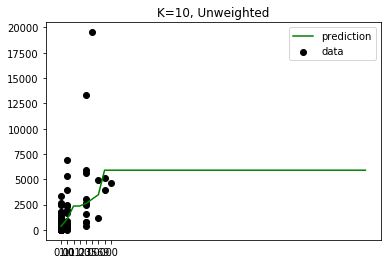

In [5]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(data.Murder)
Y = data.Property_crime
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

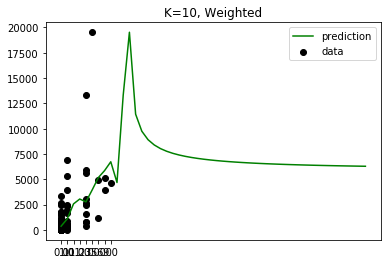

In [6]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X, Y)

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [7]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/-%0.2f)" % (score.mean(), score.std() *2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.30 (+/-0.18)
Weighted Accuracy: 0.30 (+/- 0.22)
